<a href="https://colab.research.google.com/github/EAName/yelp-reviews/blob/main/Yelp_NLP_ABSA_Maureen.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Imports 

In [3]:
import pandas as pd
import numpy as np
import os
import random
import numpy as np
import pickle 
import re,string

import nltk
from nltk.corpus import stopwords
from nltk.stem import PorterStemmer
from nltk.stem import WordNetLemmatizer
from nltk.tokenize import word_tokenize 

from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.cluster import KMeans, AgglomerativeClustering
from sklearn.metrics.pairwise import cosine_similarity
from sklearn.decomposition import TruncatedSVD, LatentDirichletAllocation
from sklearn.svm import SVC
from sklearn.preprocessing import LabelEncoder, OneHotEncoder
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import roc_auc_score, accuracy_score, confusion_matrix, silhouette_score
from sklearn.metrics import precision_score, recall_score, f1_score, classification_report
from sklearn.metrics import mean_squared_error as MSE
from sklearn.metrics import mean_absolute_error
from sklearn.model_selection import cross_val_score, StratifiedKFold
from sklearn.tree import DecisionTreeClassifier
from sklearn.naive_bayes import MultinomialNB
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split, KFold
from sklearn.manifold import MDS
from sklearn.metrics.pairwise import cosine_similarity
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.svm import LinearSVC



from sklearn.model_selection import train_test_split 
from sklearn.model_selection import GridSearchCV 
from sklearn.model_selection import cross_val_score 
from sklearn.model_selection import StratifiedKFold
from sklearn.model_selection import KFold 
from sklearn.model_selection import cross_val_predict


import seaborn as sns
import matplotlib.pyplot as plt

from gensim.models import Word2Vec,LdaMulticore, TfidfModel, CoherenceModel
from gensim import corpora
from gensim import similarities
from gensim.models.doc2vec import Doc2Vec, TaggedDocument
from gensim.models import LsiModel,LdaModel

from keras.preprocessing.text import Tokenizer
#from keras.preprocessing.sequence import pad_sequences
from tqdm import tqdm
from keras.models import Sequential
from keras.layers import Embedding, LSTM, Dense, SpatialDropout1D, GRU
from keras.callbacks import EarlyStopping
from keras.initializers import Constant
from sklearn.model_selection import train_test_split
from tensorflow.keras.optimizers import Adam, Nadam, RMSprop
from keras import Input

from IPython.display import display

In [4]:
nltk.download('stopwords')
nltk.download('wordnet')
nltk.download('omw-1.4')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package omw-1.4 to /root/nltk_data...
[nltk_data]   Package omw-1.4 is already up-to-date!


True

In [5]:
import warnings
warnings.filterwarnings('ignore')

In [6]:
from google.colab import drive
drive.mount('/content/gdrive')

Drive already mounted at /content/gdrive; to attempt to forcibly remount, call drive.mount("/content/gdrive", force_remount=True).


In [7]:
df = pd.read_csv('/content/gdrive/MyDrive/yelp_dataset/yelp_reviews_clean_version4_st_louis.csv')

In [8]:
df.shape

(292376, 5)

In [9]:
df.rename(columns = {'text':'reviews'}, inplace = True)

**Extract year**

In [10]:
df['review_year'] = df['date'].apply(lambda x:int(x[:4]))

# Aspect-Based Sentiment Analysis

ABSA Text Preprocessing (SAMPLE)

<Figure size 1800x1440 with 0 Axes>

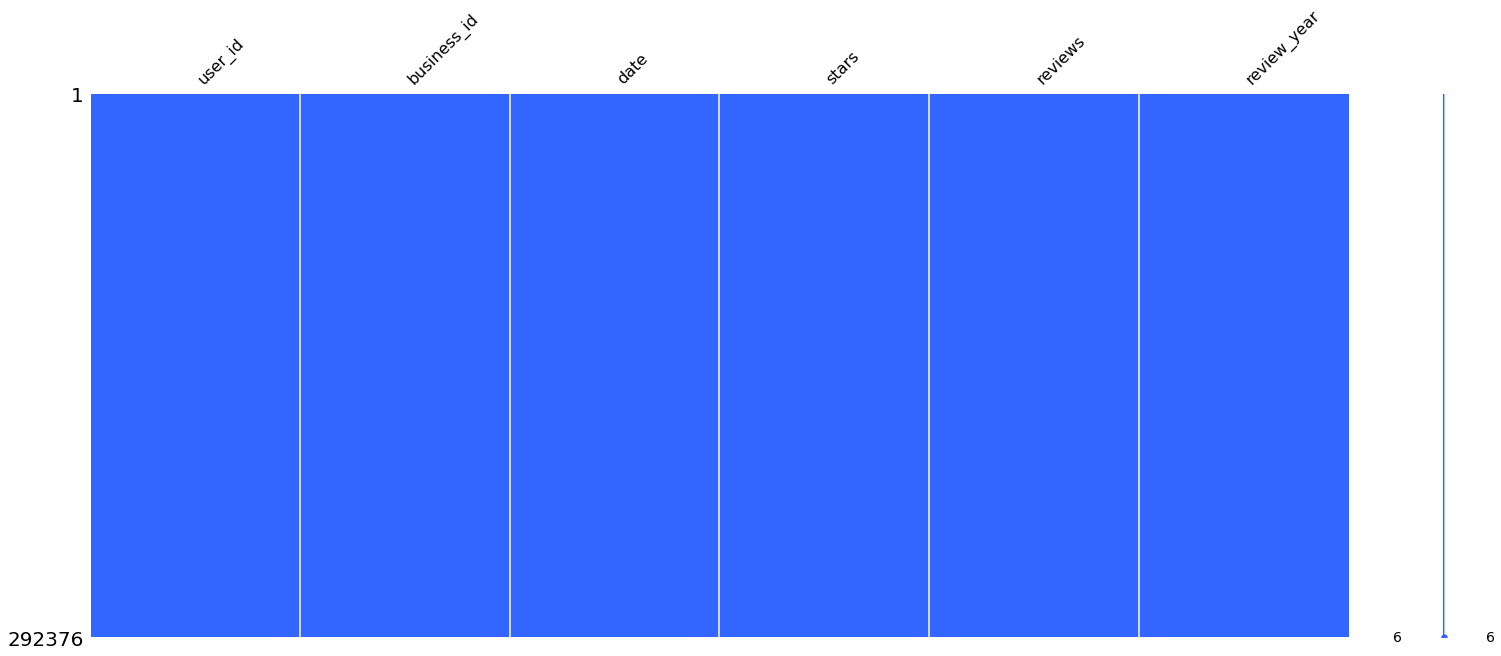

In [11]:
import missingno as msno
plt.figure(figsize=(25, 20))
msno.matrix(df, color=[0.2, 0.4, 1])
plt.show()

In [12]:
import re


def remove_url(text):
    text = re.sub(r"http\S+", "", text)
    return text


# Example string with weird font characters plus an URL which we gonna remove.
sample = "This is a yelp project. \n https://www.yelp.com 𝕒𝕟𝕕 𝕀 𝕒𝕞 😊 𝕥𝕠 𝕔𝕣𝕖𝕒𝕥𝕖 𝕥𝕙𝕚𝕤 𝕟𝕠𝕥𝕖𝕓𝕠𝕠𝕜"
print(f"Text before removing url:- \n {sample}")

sample = remove_url(sample)
print(f"Text after removing url:- \n {sample}")

Text before removing url:- 
 This is a yelp project. 
 https://www.yelp.com 𝕒𝕟𝕕 𝕀 𝕒𝕞 😊 𝕥𝕠 𝕔𝕣𝕖𝕒𝕥𝕖 𝕥𝕙𝕚𝕤 𝕟𝕠𝕥𝕖𝕓𝕠𝕠𝕜
Text after removing url:- 
 This is a yelp project. 
  𝕒𝕟𝕕 𝕀 𝕒𝕞 😊 𝕥𝕠 𝕔𝕣𝕖𝕒𝕥𝕖 𝕥𝕙𝕚𝕤 𝕟𝕠𝕥𝕖𝕓𝕠𝕠𝕜


In [13]:
import unicodedata as uni

print(f"Text before Unicode Normalization:- \n {sample}")

sample = uni.normalize('NFKD', sample)
print(f"Text after Unicode Normalization:- \n {sample}")

Text before Unicode Normalization:- 
 This is a yelp project. 
  𝕒𝕟𝕕 𝕀 𝕒𝕞 😊 𝕥𝕠 𝕔𝕣𝕖𝕒𝕥𝕖 𝕥𝕙𝕚𝕤 𝕟𝕠𝕥𝕖𝕓𝕠𝕠𝕜
Text after Unicode Normalization:- 
 This is a yelp project. 
  and I am 😊 to create this notebook


In [14]:
!pip install demoji

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [15]:
import demoji


def handle_emoji(string):
    emojis = demoji.findall(string)

    for emoji in emojis:
        string = string.replace(emoji, " " + emojis[emoji].split(":")[0])

    return string


print(f"Before Handling emoji:- \n {sample}")
print(f"After Handling emoji:- \n {handle_emoji(sample)}")

Before Handling emoji:- 
 This is a yelp project. 
  and I am 😊 to create this notebook
After Handling emoji:- 
 This is a yelp project. 
  and I am  smiling face with smiling eyes to create this notebook


In [16]:
def word_tokenizer(text):
    text = text.lower()
    text = text.split()

    return text


sample = "This is a yelp project."
print(sample)
print(word_tokenizer(sample))

This is a yelp project.
['this', 'is', 'a', 'yelp', 'project.']


In [17]:
from nltk.corpus import stopwords

en_stopwords = set(stopwords.words('english'))
print(f"Stop Words in English : \n{ en_stopwords}")

Stop Words in English : 
{'their', 'few', 'i', 'don', 'to', 'has', 'too', 'down', "you'll", "aren't", "that'll", 'mightn', 'these', 'this', 'over', 'be', 's', "wasn't", 'him', 'should', 'll', 'your', "weren't", 'off', 'with', 'where', 'there', 'than', 'not', 'do', 'doesn', 'did', 'by', 'below', "you'd", 'yourselves', 'because', 'under', "she's", 'y', 'couldn', 'about', 'once', 'now', 'through', 'any', 'myself', 'when', 'but', 'ma', 'only', 'weren', "it's", 'other', 'yours', 'most', 'm', 'ourselves', 'in', 'above', 'such', 'nor', "hadn't", 't', "mustn't", 'been', 'into', 'our', 'before', "don't", 'on', 'can', 'a', 'won', 'needn', 'that', 'are', 'again', 'no', "shan't", 'further', "isn't", "you're", 'up', 'hasn', "haven't", 'wasn', 'his', 'itself', 'does', 'them', 'were', 'same', 'here', "couldn't", 'out', 'he', 'of', 'didn', 'you', 'shan', 'am', "needn't", 'shouldn', 'd', 'until', "should've", 'wouldn', 'having', 'some', 'had', "won't", 'as', 'all', "shouldn't", 'have', 'during', 'the',

In [18]:
def remove_stopwords(text):
    text = [word for word in text if word not in en_stopwords]
    return text


print(f"Before removing stopwords : {word_tokenizer(sample)}")
print(f"After removing stopwords : {remove_stopwords(word_tokenizer(sample))}")

Before removing stopwords : ['this', 'is', 'a', 'yelp', 'project.']
After removing stopwords : ['yelp', 'project.']


In [19]:
from nltk.stem.porter import PorterStemmer
from nltk.stem.lancaster import LancasterStemmer

stemmer = PorterStemmer()
# stemmer = LancasterStemmer()


def stemming(text):

    text = [stemmer.stem(word) for word in text]
    return text


sample = "I am creating a Notebook"
print(f"Before Stemming : {(sample)}")
print(f"After Stemming : {stemming(word_tokenizer(sample))}")

Before Stemming : I am creating a Notebook
After Stemming : ['i', 'am', 'creat', 'a', 'notebook']


In [20]:
! pip install langdetect

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [21]:
from langdetect import detect

en_text = u""""Hi Everyone I am Ankit Gupta."""
print(f" {en_text} : {detect(en_text)}")

hindi_text = u"""मेरा नाम अंकित गुप्ता है और मैं एक छात्र हूँ"""
print(f"{hindi_text} : {detect(hindi_text)}")

 "Hi Everyone I am Ankit Gupta. : tl
मेरा नाम अंकित गुप्ता है और मैं एक छात्र हूँ : hi


In [22]:
import spacy

sp = spacy.load("en_core_web_sm")

In [23]:
def lemmatization(text):

    # text = [sp(word).lemma_ for word in text]

    text = " ".join(text)
    token = sp(text)

    text = [word.lemma_ for word in token]
    return text


print(f"Before Lemmatization : {word_tokenizer(sample)}")
print(f"After Lemmatization : {lemmatization(word_tokenizer(sample))}")

Before Lemmatization : ['i', 'am', 'creating', 'a', 'notebook']
After Lemmatization : ['I', 'be', 'create', 'a', 'notebook']


In [24]:
df_temp = df.copy()

In [25]:
df_temp.head()

,user_id,business_id,date,stars,reviews,review_year
0,9OAtfnWag-ajVxRbUTGIyg,lj-E32x9_FA7GmUrBGBEWg,2014-06-27 22:44:01,4.0,Love going here for happy hour or dinner! Gre...,2014
1,5h9JA231vPilNAIjHxwGng,lj-E32x9_FA7GmUrBGBEWg,2014-08-24 19:24:26,5.0,My friends at work (connoisseurs of good food ...,2014
2,c1fSI6Dv5lybr0AJh67e7w,lj-E32x9_FA7GmUrBGBEWg,2015-09-24 15:01:11,4.0,"Great service, relaxing atmosphere and the foo...",2015
3,st-q1iyW3sJm-v0OCrheoQ,lj-E32x9_FA7GmUrBGBEWg,2015-10-17 04:56:25,5.0,I went to Brio for the first time on Wednesday...,2015
4,9qBdzBzoDxLFSMhhGrTWJg,lj-E32x9_FA7GmUrBGBEWg,2016-01-04 16:56:32,4.0,I usually steer clear of the chain restaurants...,2016


In [26]:
df_temp['stars'] = df['stars'].astype('int')

In [27]:
df_temp.head()

,user_id,business_id,date,stars,reviews,review_year
0,9OAtfnWag-ajVxRbUTGIyg,lj-E32x9_FA7GmUrBGBEWg,2014-06-27 22:44:01,4,Love going here for happy hour or dinner! Gre...,2014
1,5h9JA231vPilNAIjHxwGng,lj-E32x9_FA7GmUrBGBEWg,2014-08-24 19:24:26,5,My friends at work (connoisseurs of good food ...,2014
2,c1fSI6Dv5lybr0AJh67e7w,lj-E32x9_FA7GmUrBGBEWg,2015-09-24 15:01:11,4,"Great service, relaxing atmosphere and the foo...",2015
3,st-q1iyW3sJm-v0OCrheoQ,lj-E32x9_FA7GmUrBGBEWg,2015-10-17 04:56:25,5,I went to Brio for the first time on Wednesday...,2015
4,9qBdzBzoDxLFSMhhGrTWJg,lj-E32x9_FA7GmUrBGBEWg,2016-01-04 16:56:32,4,I usually steer clear of the chain restaurants...,2016


In [28]:
df_temp.describe()

,stars,review_year
count,292376.000000,292376.000000
mean,3.787113,2016.096964
std,1.368116,3.196996
min,1.000000,2005.000000
25%,3.000000,2014.000000
50%,4.000000,2016.000000
75%,5.000000,2019.000000
max,5.000000,2022.000000


In [29]:
# Assigning labels to each review

def label(stars):
    if stars == 5:
        return 1
    elif stars == 4:
        return 1
    else:
        return 0
    
from tqdm import tqdm

tqdm.pandas()

df_temp['y'] = df_temp.stars.progress_map(label)

100%|██████████| 292376/292376 [00:00<00:00, 749332.79it/s]


In [30]:
df_temp = df_temp[['user_id', 'business_id', 'date', 'review_year', 'reviews', 'y', 'stars']]

In [31]:
df_temp.head()

,user_id,business_id,date,review_year,reviews,y,stars
0,9OAtfnWag-ajVxRbUTGIyg,lj-E32x9_FA7GmUrBGBEWg,2014-06-27 22:44:01,2014,Love going here for happy hour or dinner! Gre...,1,4
1,5h9JA231vPilNAIjHxwGng,lj-E32x9_FA7GmUrBGBEWg,2014-08-24 19:24:26,2014,My friends at work (connoisseurs of good food ...,1,5
2,c1fSI6Dv5lybr0AJh67e7w,lj-E32x9_FA7GmUrBGBEWg,2015-09-24 15:01:11,2015,"Great service, relaxing atmosphere and the foo...",1,4
3,st-q1iyW3sJm-v0OCrheoQ,lj-E32x9_FA7GmUrBGBEWg,2015-10-17 04:56:25,2015,I went to Brio for the first time on Wednesday...,1,5
4,9qBdzBzoDxLFSMhhGrTWJg,lj-E32x9_FA7GmUrBGBEWg,2016-01-04 16:56:32,2016,I usually steer clear of the chain restaurants...,1,4


In [32]:
df_temp.describe()

,review_year,y,stars
count,292376.000000,292376.000000,292376.000000
mean,2016.096964,0.676851,3.787113
std,3.196996,0.467680,1.368116
min,2005.000000,0.000000,1.000000
25%,2014.000000,0.000000,3.000000
50%,2016.000000,1.000000,4.000000
75%,2019.000000,1.000000,5.000000
max,2022.000000,1.000000,5.000000


In [33]:
df_temp.y.value_counts()

1    197895
0     94481
Name: y, dtype: int64

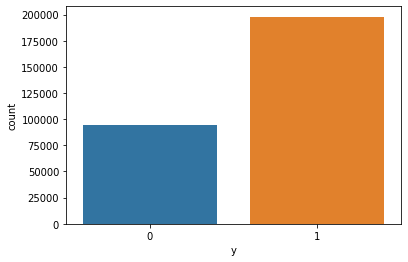

In [34]:
import seaborn as sns

sns.countplot(x = "y", data = df_temp)
plt.show()

In [35]:
df_temp2 = df_temp[(df_temp['stars'] == 5)]

In [36]:
df_temp2.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 124247 entries, 1 to 292375
Data columns (total 7 columns):
 #   Column       Non-Null Count   Dtype 
---  ------       --------------   ----- 
 0   user_id      124247 non-null  object
 1   business_id  124247 non-null  object
 2   date         124247 non-null  object
 3   review_year  124247 non-null  int64 
 4   reviews      124247 non-null  object
 5   y            124247 non-null  int64 
 6   stars        124247 non-null  int64 
dtypes: int64(3), object(4)
memory usage: 7.6+ MB


In [37]:
df_temp2.head()

,user_id,business_id,date,review_year,reviews,y,stars
1,5h9JA231vPilNAIjHxwGng,lj-E32x9_FA7GmUrBGBEWg,2014-08-24 19:24:26,2014,My friends at work (connoisseurs of good food ...,1,5
3,st-q1iyW3sJm-v0OCrheoQ,lj-E32x9_FA7GmUrBGBEWg,2015-10-17 04:56:25,2015,I went to Brio for the first time on Wednesday...,1,5
6,kX9OMmA9XLpNPWXQtTe33Q,lj-E32x9_FA7GmUrBGBEWg,2017-02-09 19:39:40,2017,"I love this cute Italian restaurant, it's grea...",1,5
16,gjzKWzc8ZPn5Aylf8TMfTg,lj-E32x9_FA7GmUrBGBEWg,2015-11-21 16:11:54,2015,I've been here 2 times now. The food is absolu...,1,5
25,4xV0D0udUpKbm5k7MxhfnA,lj-E32x9_FA7GmUrBGBEWg,2018-07-29 02:41:42,2018,Amazing anniversary dinner. Staff all wished u...,1,5


ABSA Text Preprocessing (ENTIRE TEXT)

In [38]:
def preprocessing(text):
    
    text = remove_url(text) 
    text = uni.normalize('NFKD', text)
    text = handle_emoji(text)
    text = text.lower() 
    text = re.sub(r'[^\w\s]', '', text)
    text = word_tokenizer(text)
    #text = stemming(text)
    text = lemmatization(text)
    text = remove_stopwords(text)
    text = " ".join(text)

    return text

In [39]:
from tqdm import tqdm

tqdm.pandas()

df['clean_review'] = df['reviews'].progress_map(preprocessing)

100%|██████████| 292376/292376 [2:14:35<00:00, 36.20it/s]


In [40]:
df.head()

,user_id,business_id,date,stars,reviews,review_year,clean_review
0,9OAtfnWag-ajVxRbUTGIyg,lj-E32x9_FA7GmUrBGBEWg,2014-06-27 22:44:01,4.0,Love going here for happy hour or dinner! Gre...,2014,love go happy hour dinner great patio fan beat...
1,5h9JA231vPilNAIjHxwGng,lj-E32x9_FA7GmUrBGBEWg,2014-08-24 19:24:26,5.0,My friends at work (connoisseurs of good food ...,2014,friend work connoisseur good food st louis are...
2,c1fSI6Dv5lybr0AJh67e7w,lj-E32x9_FA7GmUrBGBEWg,2015-09-24 15:01:11,4.0,"Great service, relaxing atmosphere and the foo...",2015,great service relax atmosphere food exceptiona...
3,st-q1iyW3sJm-v0OCrheoQ,lj-E32x9_FA7GmUrBGBEWg,2015-10-17 04:56:25,5.0,I went to Brio for the first time on Wednesday...,2015,I go brio first time wednesday dinner friend s...
4,9qBdzBzoDxLFSMhhGrTWJg,lj-E32x9_FA7GmUrBGBEWg,2016-01-04 16:56:32,4.0,I usually steer clear of the chain restaurants...,2016,I usually steer clear chain restaurant since m...


In [41]:
reviews = df.clean_review.values.tolist()

In [42]:
from tqdm import tqdm

tqdm.pandas()

df['clean_review2'] = df['clean_review'].progress_map(word_tokenizer)

100%|██████████| 292376/292376 [00:05<00:00, 58459.25it/s]


In [43]:
df.head()

,user_id,business_id,date,stars,reviews,review_year,clean_review,clean_review2
0,9OAtfnWag-ajVxRbUTGIyg,lj-E32x9_FA7GmUrBGBEWg,2014-06-27 22:44:01,4.0,Love going here for happy hour or dinner! Gre...,2014,love go happy hour dinner great patio fan beat...,"[love, go, happy, hour, dinner, great, patio, ..."
1,5h9JA231vPilNAIjHxwGng,lj-E32x9_FA7GmUrBGBEWg,2014-08-24 19:24:26,5.0,My friends at work (connoisseurs of good food ...,2014,friend work connoisseur good food st louis are...,"[friend, work, connoisseur, good, food, st, lo..."
2,c1fSI6Dv5lybr0AJh67e7w,lj-E32x9_FA7GmUrBGBEWg,2015-09-24 15:01:11,4.0,"Great service, relaxing atmosphere and the foo...",2015,great service relax atmosphere food exceptiona...,"[great, service, relax, atmosphere, food, exce..."
3,st-q1iyW3sJm-v0OCrheoQ,lj-E32x9_FA7GmUrBGBEWg,2015-10-17 04:56:25,5.0,I went to Brio for the first time on Wednesday...,2015,I go brio first time wednesday dinner friend s...,"[i, go, brio, first, time, wednesday, dinner, ..."
4,9qBdzBzoDxLFSMhhGrTWJg,lj-E32x9_FA7GmUrBGBEWg,2016-01-04 16:56:32,4.0,I usually steer clear of the chain restaurants...,2016,I usually steer clear chain restaurant since m...,"[i, usually, steer, clear, chain, restaurant, ..."


In [44]:
data_words = df['clean_review2'].values.tolist()
len(data_words)

292376

In [45]:
#save checkpoint
df.to_csv("/content/gdrive/MyDrive/yelp_dataset/Clean_Yelp_ABSA_Reviews2.csv", index = False)

In [46]:
import gensim.corpora as corpora

# Create Dictionary
id2word = corpora.Dictionary(data_words)
# Create Corpus
texts = data_words
# Term Document Frequency
corpus = [id2word.doc2bow(text) for text in texts]
# View
print(corpus[:1][0][:30])

[(0, 1), (1, 1), (2, 1), (3, 1), (4, 1), (5, 1), (6, 1), (7, 1), (8, 1), (9, 1), (10, 1), (11, 1), (12, 1), (13, 1), (14, 1), (15, 1), (16, 1), (17, 1), (18, 1), (19, 1), (20, 1), (21, 1), (22, 1), (23, 1), (24, 1), (25, 1)]


In [47]:
from gensim.models import LdaMulticore
from gensim.models import LdaModel
from pprint import pprint

# number of topics
num_topics = 10
# Build LDA model
lda_model = LdaMulticore(corpus=corpus, id2word=id2word,
                     num_topics=num_topics, iterations=400)
# Print the Keyword in the 10 topics
pprint(lda_model.print_topics())
doc_lda = lda_model[corpus]

[(0,
  '0.105*"pizza" + 0.033*"salad" + 0.024*"i" + 0.018*"cheese" + 0.016*"crust" '
  '+ 0.013*"order" + 0.013*"good" + 0.010*"sauce" + 0.010*"topping" + '
  '0.009*"get"'),
 (1,
  '0.056*"i" + 0.029*"good" + 0.026*"food" + 0.026*"st" + 0.024*"louis" + '
  '0.022*"place" + 0.017*"restaurant" + 0.013*"try" + 0.013*"thai" + '
  '0.011*"dish"'),
 (2,
  '0.115*"i" + 0.018*"order" + 0.016*"food" + 0.014*"go" + 0.013*"get" + '
  '0.011*"time" + 0.010*"say" + 0.010*"place" + 0.009*"would" + 0.009*"like"'),
 (3,
  '0.026*"wait" + 0.021*"table" + 0.019*"food" + 0.019*"get" + 0.019*"minute" '
  '+ 0.017*"come" + 0.017*"order" + 0.015*"drink" + 0.015*"take" + '
  '0.014*"time"'),
 (4,
  '0.044*"chicken" + 0.039*"fry" + 0.026*"sandwich" + 0.022*"burger" + '
  '0.019*"good" + 0.018*"cheese" + 0.017*"sauce" + 0.013*"order" + '
  '0.013*"potato" + 0.012*"side"'),
 (5,
  '0.015*"wine" + 0.014*"steak" + 0.013*"dinner" + 0.012*"restaurant" + '
  '0.010*"experience" + 0.009*"night" + 0.009*"dining" + 0.

In [48]:
#data_words = df['clean_review2']

#def gen_words(data_words):
#    yield data_words
data_words = df['clean_review2'].values.tolist()
len(data_words)

292376

In [49]:
%%time
from gensim.models import FastText
fasttext_model = FastText(data_words, size=100, window=5, min_count=5, workers=4,sg=1)
# fasttext_model = FastText.load_fasttext_format("../input/fast100/cc.en.100.bin")

CPU times: user 25min 47s, sys: 3.36 s, total: 25min 50s
Wall time: 13min 26s


In [50]:
fasttext_model.save("FastText-Model-For-ABSA.bin")

In [51]:
print(fasttext_model.wv['service'])

[ 0.11161157  0.13919845 -0.1320141  -0.13125886  0.24426009 -0.0766753
 -0.03265483 -0.2534362   0.09373141 -0.25906444  0.1756083   0.06498928
  0.03394561  0.00783977 -0.41098693  0.0187496  -0.39475632  0.20405386
 -0.26476985 -0.15422079  0.32190934  0.31294486 -0.450854    0.3762911
  0.51335096 -0.05387257 -0.12655723  0.20022312  0.21737675 -0.16788492
 -0.22382095 -0.1741892   0.27145514 -0.02698541  0.5913705  -0.36435422
  0.07780357  0.01718424  0.3165588   0.04981562  0.34859073 -0.3621168
 -0.51721543 -0.32500473 -0.4370381  -0.2893733   0.23029533 -0.11282208
 -0.15471359 -0.1959459  -0.2926862   0.25445896  0.11593823 -0.13931152
  0.22482131  0.07110508  0.12855722 -0.06902418 -0.19909674  0.28235316
  0.02575272  0.17689599  0.39664373  0.08227926 -0.19386992  0.41935635
 -0.09664096 -0.26038542 -0.08585173 -0.1474843   0.06199944 -0.16014521
 -0.4099759  -0.2465112  -0.05851781 -0.473936    0.17616935 -0.18061118
  0.01961164 -0.11829029  0.27819687 -0.05283042  0.16

In [52]:
semantically_similar_words = {words: [item[0] for item in fasttext_model.wv.most_similar([words], topn=5)]
                  for words in ['food', 'service', 'place', 'price']}

for k,v in semantically_similar_words.items():
    print(k+":"+str(v))

food:['food3', 'food4', 'fooda', 'foodall', 'foodoh']
service:['serviceso', 'service4', 'serviceit', 'serviced', 'serviceour']
place:['placea', 'placeit', 'placeif', 'placefood', 'placeso']
price:['pricing', 'priced', 'pricei', 'pricetag', 'pricer']


In [53]:
print(fasttext_model.wv.similarity(w1='food', w2='service'))

0.59191245


In [54]:
print(fasttext_model.wv.similarity(w1='food', w2='place'))

0.5579984


In [55]:
print(fasttext_model.wv.similarity(w1='food', w2='price'))

0.47630614


In [56]:
print(fasttext_model.wv.similarity(w1='place', w2='service'))

0.46273276


In [57]:
print(fasttext_model.wv.similarity(w1='place', w2='price'))

0.4090378


In [58]:
print(fasttext_model.wv.similarity(w1='service', w2='price'))

0.4894688


In [59]:
fasttext_model.wv.similarity('I was very surprised by this place', 'place')

0.66795117

In [60]:
fasttext_model.wv.similarity("I was very surprised by this place", "service")

0.47162268

In [61]:
fasttext_model.wv.similarity("I was very surprised by this place", "food")

0.59318775

In [62]:
fasttext_model.wv.similarity("I was very surprised by this place", "price")

0.4741543

In [63]:
aspects = ["food", "service", "place", "price"]

def get_similarity(text, aspect):
    try:
        text = " ".join(text)
        return fasttext_model.wv.similarity(text, aspect)
    except:
        return 0

In [77]:
from tqdm import tqdm
tqdm.pandas()
for aspect in aspects:
    df[aspect] = df['clean_review2'].progress_map(lambda text: get_similarity(text, aspect))

100%|██████████| 292376/292376 [08:45<00:00, 556.32it/s]


In [81]:
df.head()

,user_id,business_id,date,stars,reviews,review_year,clean_review,clean_review2,food,service,place,price
0,9OAtfnWag-ajVxRbUTGIyg,lj-E32x9_FA7GmUrBGBEWg,2014-06-27 22:44:01,4.0,Love going here for happy hour or dinner! Gre...,2014,love go happy hour dinner great patio fan beat...,"[love, go, happy, hour, dinner, great, patio, ...",0.533379,0.550373,0.604214,0.501414
1,5h9JA231vPilNAIjHxwGng,lj-E32x9_FA7GmUrBGBEWg,2014-08-24 19:24:26,5.0,My friends at work (connoisseurs of good food ...,2014,friend work connoisseur good food st louis are...,"[friend, work, connoisseur, good, food, st, lo...",0.603309,0.578850,0.592573,0.506964
2,c1fSI6Dv5lybr0AJh67e7w,lj-E32x9_FA7GmUrBGBEWg,2015-09-24 15:01:11,4.0,"Great service, relaxing atmosphere and the foo...",2015,great service relax atmosphere food exceptiona...,"[great, service, relax, atmosphere, food, exce...",0.635701,0.723729,0.620446,0.501792
3,st-q1iyW3sJm-v0OCrheoQ,lj-E32x9_FA7GmUrBGBEWg,2015-10-17 04:56:25,5.0,I went to Brio for the first time on Wednesday...,2015,I go brio first time wednesday dinner friend s...,"[i, go, brio, first, time, wednesday, dinner, ...",0.614665,0.597369,0.633347,0.536175
4,9qBdzBzoDxLFSMhhGrTWJg,lj-E32x9_FA7GmUrBGBEWg,2016-01-04 16:56:32,4.0,I usually steer clear of the chain restaurants...,2016,I usually steer clear chain restaurant since m...,"[i, usually, steer, clear, chain, restaurant, ...",0.565750,0.524968,0.690019,0.501281


In [82]:
#save checkpoint
df.to_csv("/content/gdrive/MyDrive/yelp_dataset/Clean_Yelp_ABSA_Reviews2.csv", index = False)

In [83]:
df.describe()

,stars,review_year,food,service,place,price
count,292376.000000,292376.000000,292376.000000,292376.000000,292376.000000,292376.000000
mean,3.787113,2016.096964,0.577500,0.544896,0.596461,0.508878
std,1.368116,3.196996,0.047507,0.067984,0.051792,0.048489
min,1.000000,2005.000000,0.000000,-0.046627,0.000000,0.000000
25%,3.000000,2014.000000,0.549304,0.500160,0.564553,0.480152
50%,4.000000,2016.000000,0.580594,0.542505,0.599314,0.508434
75%,5.000000,2019.000000,0.609243,0.587919,0.631412,0.536732
max,5.000000,2022.000000,0.768563,0.846891,0.817265,0.778234


In [84]:
df.dtypes

user_id           object
business_id       object
date              object
stars            float64
reviews           object
review_year        int64
clean_review      object
clean_review2     object
food             float64
service          float64
place            float64
price            float64
dtype: object

In [85]:
#rename columns
df.rename(columns = {'food':'food_similarity'}, inplace = True)
df.rename(columns = {'service':'service_similarity'}, inplace = True)
df.rename(columns = {'place':'place_similarity'}, inplace = True)
df.rename(columns = {'price':'price_similarity'}, inplace = True)

In [86]:
df.head()

,user_id,business_id,date,stars,reviews,review_year,clean_review,clean_review2,food_similarity,service_similarity,place_similarity,price_similarity
0,9OAtfnWag-ajVxRbUTGIyg,lj-E32x9_FA7GmUrBGBEWg,2014-06-27 22:44:01,4.0,Love going here for happy hour or dinner! Gre...,2014,love go happy hour dinner great patio fan beat...,"[love, go, happy, hour, dinner, great, patio, ...",0.533379,0.550373,0.604214,0.501414
1,5h9JA231vPilNAIjHxwGng,lj-E32x9_FA7GmUrBGBEWg,2014-08-24 19:24:26,5.0,My friends at work (connoisseurs of good food ...,2014,friend work connoisseur good food st louis are...,"[friend, work, connoisseur, good, food, st, lo...",0.603309,0.578850,0.592573,0.506964
2,c1fSI6Dv5lybr0AJh67e7w,lj-E32x9_FA7GmUrBGBEWg,2015-09-24 15:01:11,4.0,"Great service, relaxing atmosphere and the foo...",2015,great service relax atmosphere food exceptiona...,"[great, service, relax, atmosphere, food, exce...",0.635701,0.723729,0.620446,0.501792
3,st-q1iyW3sJm-v0OCrheoQ,lj-E32x9_FA7GmUrBGBEWg,2015-10-17 04:56:25,5.0,I went to Brio for the first time on Wednesday...,2015,I go brio first time wednesday dinner friend s...,"[i, go, brio, first, time, wednesday, dinner, ...",0.614665,0.597369,0.633347,0.536175
4,9qBdzBzoDxLFSMhhGrTWJg,lj-E32x9_FA7GmUrBGBEWg,2016-01-04 16:56:32,4.0,I usually steer clear of the chain restaurants...,2016,I usually steer clear chain restaurant since m...,"[i, usually, steer, clear, chain, restaurant, ...",0.565750,0.524968,0.690019,0.501281


In [87]:
df['food_similarity']=df['food_similarity'].astype('float')

In [104]:
#filter food similarity

def cat_similarity(x):
    if x > 0.60:
        return '1'
    else:
        return '0'

df['food'] = df['food_similarity'].apply(cat_similarity)

df['food_similarity'].value_counts()

0.613320    5
0.573721    4
0.551213    4
0.590407    4
0.611379    4
           ..
0.540699    1
0.567810    1
0.563687    1
0.648505    1
0.518570    1
Name: food_similarity, Length: 276426, dtype: int64

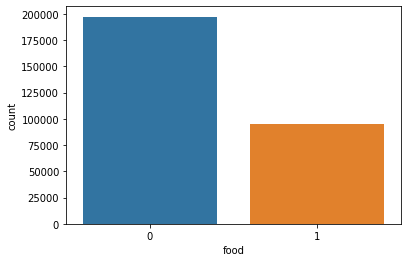

In [105]:
import seaborn as sns

sns.countplot(x = "food", data = df)
plt.show()

In [106]:
#filter service similarity
def cat_similarity(x):
    if x > 0.60:
        return '1'
    else:
        return '0'

df['service'] = df['service_similarity'].apply(cat_similarity)

df['service_similarity'].value_counts()

0.566939    4
0.520032    4
0.555218    4
0.508155    4
0.567525    4
           ..
0.455987    1
0.549431    1
0.608109    1
0.522804    1
0.446904    1
Name: service_similarity, Length: 281965, dtype: int64

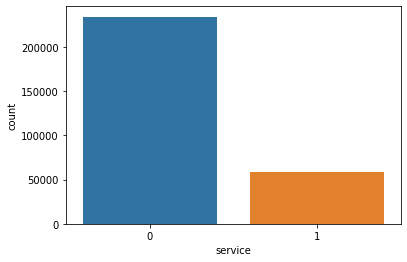

In [107]:
sns.countplot(x = "service", data = df)
plt.show()

In [108]:
#filter place similarity
def cat_similarity(x):
    if x > 0.60:
        return '1'
    else:
        return '0'

df['place'] = df['place_similarity'].apply(cat_similarity)

df['place_similarity'].value_counts()

0.590413    4
0.586422    4
0.567581    4
0.596857    4
0.609993    4
           ..
0.523070    1
0.581824    1
0.487596    1
0.538697    1
0.549674    1
Name: place_similarity, Length: 277881, dtype: int64

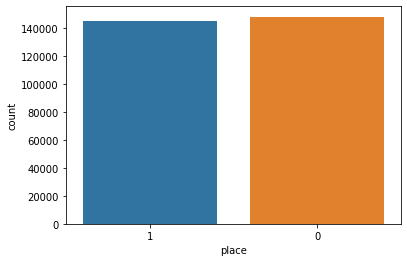

In [109]:
sns.countplot(x = "place", data = df)
plt.show()

In [110]:
#filter price similarity
def cat_similarity(x):
    if x > 0.60:
        return '1'
    else:
        return '0'

df['price'] = df['price_similarity'].apply(cat_similarity)

df['price_similarity'].value_counts()

0.514374    4
0.504477    4
0.519188    4
0.520334    4
0.532638    4
           ..
0.495542    1
0.584874    1
0.541759    1
0.529147    1
0.516854    1
Name: price_similarity, Length: 279145, dtype: int64

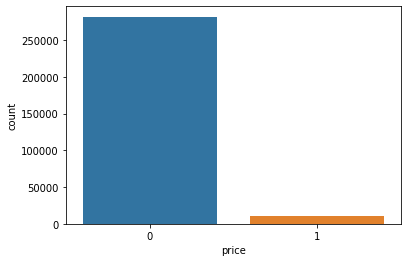

In [111]:
sns.countplot(x = "price", data = df)
plt.show()

In [112]:
#add sentiment
Cust = []
for i in df['stars']:
    if (i == 1):
        Cust.append('BAD')
    elif (i == 3) | (i == 2):
        Cust.append('NEUTRAL')
    else:
        Cust.append('GOOD')
        

df['Customer EXP'] = Cust
df['Customer EXP'].value_counts()

GOOD       197895
NEUTRAL     61608
BAD         32873
Name: Customer EXP, dtype: int64

In [113]:
df.head()

,user_id,business_id,date,stars,reviews,review_year,clean_review,clean_review2,food_similarity,service_similarity,place_similarity,price_similarity,food,service,place,price,Customer EXP
0,9OAtfnWag-ajVxRbUTGIyg,lj-E32x9_FA7GmUrBGBEWg,2014-06-27 22:44:01,4.0,Love going here for happy hour or dinner! Gre...,2014,love go happy hour dinner great patio fan beat...,"[love, go, happy, hour, dinner, great, patio, ...",0.533379,0.550373,0.604214,0.501414,0,0,1,0,GOOD
1,5h9JA231vPilNAIjHxwGng,lj-E32x9_FA7GmUrBGBEWg,2014-08-24 19:24:26,5.0,My friends at work (connoisseurs of good food ...,2014,friend work connoisseur good food st louis are...,"[friend, work, connoisseur, good, food, st, lo...",0.603309,0.578850,0.592573,0.506964,1,0,0,0,GOOD
2,c1fSI6Dv5lybr0AJh67e7w,lj-E32x9_FA7GmUrBGBEWg,2015-09-24 15:01:11,4.0,"Great service, relaxing atmosphere and the foo...",2015,great service relax atmosphere food exceptiona...,"[great, service, relax, atmosphere, food, exce...",0.635701,0.723729,0.620446,0.501792,1,1,1,0,GOOD
3,st-q1iyW3sJm-v0OCrheoQ,lj-E32x9_FA7GmUrBGBEWg,2015-10-17 04:56:25,5.0,I went to Brio for the first time on Wednesday...,2015,I go brio first time wednesday dinner friend s...,"[i, go, brio, first, time, wednesday, dinner, ...",0.614665,0.597369,0.633347,0.536175,1,0,1,0,GOOD
4,9qBdzBzoDxLFSMhhGrTWJg,lj-E32x9_FA7GmUrBGBEWg,2016-01-04 16:56:32,4.0,I usually steer clear of the chain restaurants...,2016,I usually steer clear chain restaurant since m...,"[i, usually, steer, clear, chain, restaurant, ...",0.565750,0.524968,0.690019,0.501281,0,0,1,0,GOOD


In [114]:
df.to_csv("/content/gdrive/MyDrive/yelp_dataset/Clean_Yelp_ABSA_Reviews2.csv", index = False)

# Model to predict sentiments on the basis of these aspects.

In [117]:
import torch
from torch import nn
from torch.utils.data import Dataset
from torch.utils.data import DataLoader
from torch.utils.data import RandomSampler
import warnings

Configs

In [118]:
class config:
    warnings.filterwarnings("ignore", category = UserWarning)
    IMG_SIZE = (224,224)
    DEVICE = ("cuda" if torch.cuda.is_available() else "cpu")
    FOLDS = 5
    SHUFFLE = True
    BATCH_SIZE = 32
    LR = 0.01
    EPOCHS = 30
    EMB_DIM = 100
    MAX_LEN = 20
    MODEL_PATH = "./Models/MyModel.pt"


In [119]:
df_absa = pd.read_csv("/content/gdrive/MyDrive/yelp_dataset/Clean_Yelp_ABSA_Reviews2.csv")
df_absa.head()

,user_id,business_id,date,stars,reviews,review_year,clean_review,clean_review2,food_similarity,service_similarity,place_similarity,price_similarity,food,service,place,price,Customer EXP
0,9OAtfnWag-ajVxRbUTGIyg,lj-E32x9_FA7GmUrBGBEWg,2014-06-27 22:44:01,4.0,Love going here for happy hour or dinner! Gre...,2014,love go happy hour dinner great patio fan beat...,"['love', 'go', 'happy', 'hour', 'dinner', 'gre...",0.533379,0.550373,0.604214,0.501414,0,0,1,0,GOOD
1,5h9JA231vPilNAIjHxwGng,lj-E32x9_FA7GmUrBGBEWg,2014-08-24 19:24:26,5.0,My friends at work (connoisseurs of good food ...,2014,friend work connoisseur good food st louis are...,"['friend', 'work', 'connoisseur', 'good', 'foo...",0.603309,0.578850,0.592573,0.506964,1,0,0,0,GOOD
2,c1fSI6Dv5lybr0AJh67e7w,lj-E32x9_FA7GmUrBGBEWg,2015-09-24 15:01:11,4.0,"Great service, relaxing atmosphere and the foo...",2015,great service relax atmosphere food exceptiona...,"['great', 'service', 'relax', 'atmosphere', 'f...",0.635701,0.723729,0.620446,0.501792,1,1,1,0,GOOD
3,st-q1iyW3sJm-v0OCrheoQ,lj-E32x9_FA7GmUrBGBEWg,2015-10-17 04:56:25,5.0,I went to Brio for the first time on Wednesday...,2015,I go brio first time wednesday dinner friend s...,"['i', 'go', 'brio', 'first', 'time', 'wednesda...",0.614665,0.597369,0.633347,0.536175,1,0,1,0,GOOD
4,9qBdzBzoDxLFSMhhGrTWJg,lj-E32x9_FA7GmUrBGBEWg,2016-01-04 16:56:32,4.0,I usually steer clear of the chain restaurants...,2016,I usually steer clear chain restaurant since m...,"['i', 'usually', 'steer', 'clear', 'chain', 'r...",0.565750,0.524968,0.690019,0.501281,0,0,1,0,GOOD


In [120]:
df_absa.describe()

,stars,review_year,food_similarity,service_similarity,place_similarity,price_similarity,food,service,place,price
count,292376.000000,292376.000000,292376.000000,292376.000000,292376.000000,292376.000000,292376.000000,292376.000000,292376.000000,292376.000000
mean,3.787113,2016.096964,0.577500,0.544896,0.596461,0.508878,0.325222,0.199356,0.494363,0.035492
std,1.368116,3.196996,0.047507,0.067984,0.051792,0.048489,0.468458,0.399517,0.499969,0.185020
min,1.000000,2005.000000,0.000000,-0.046627,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,3.000000,2014.000000,0.549304,0.500160,0.564553,0.480152,0.000000,0.000000,0.000000,0.000000
50%,4.000000,2016.000000,0.580594,0.542505,0.599314,0.508434,0.000000,0.000000,0.000000,0.000000
75%,5.000000,2019.000000,0.609243,0.587919,0.631412,0.536732,1.000000,0.000000,1.000000,0.000000
max,5.000000,2022.000000,0.768563,0.846891,0.817265,0.778234,1.000000,1.000000,1.000000,1.000000


Dataset Generator

In [136]:
class Vocabulary:
  
    '''
    __init__ method is called by default as soon as an object of this class is initiated
    we use this method to initiate our vocab dictionaries
    '''
    def __init__(self, freq_threshold, max_size):
        '''
        freq_threshold : the minimum times a word must occur in corpus to be treated in vocab
        max_size : max source vocab size. Eg. if set to 10,000, we pick the top 10,000 most frequent words and discard others
        '''
        #initiate the index to token dict
        ## PAD -> padding, used for padding the shorter sentences in a batch to match the length of longest sentence in the batch
        ## SOS -> start token, added in front of each sentence to signify the start of sentence
        ## EOS -> End of sentence token, added to the end of each sentence to signify the end of sentence
        ## UNK -> words which are not found in the vocab are replace by this token
        self.itos = {0: 'padding', 1:'start', 2:'end', 3: 'unknown'}
        #initiate the token to index dict
        self.stoi = {k:j for j,k in self.itos.items()} 
        
        self.freq_threshold = freq_threshold
        self.max_size = max_size
    
    '''
    __len__ is used by dataloader later to create batches
    '''
    def __len__(self):
        return len(self.itos)
    
    '''
    a simple tokenizer to split on space and converts the sentence to list of words
    '''
    @staticmethod
    def tokenizer(text):
        return [tok.lower().strip() for tok in text.split(' ')]
    
    '''
    build the vocab: create a dictionary mapping of index to string (itos) and string to index (stoi)
    output ex. for stoi -> {'the':5, 'a':6, 'an':7}
    '''
    def build_vocabulary(self, sentence_list):
        #calculate the frequencies of each word first to remove the words with freq < freq_threshold
        frequencies = {}  #init the freq dict
        idx = 4 #index from which we want our dict to start. We already used 4 indexes for pad, start, end, unk
        
        #calculate freq of words
        for sentence in sentence_list:
            for word in self.tokenizer(sentence):
                if word not in frequencies.keys():
                    frequencies[word]=1
                else:
                    frequencies[word]+=1
                    
                    
        #limit vocab by removing low freq words
        frequencies = {k:v for k,v in frequencies.items() if v>self.freq_threshold} 
        
        #limit vocab to the max_size specified
        frequencies = dict(sorted(frequencies.items(), key = lambda x: -x[1])[:self.max_size-idx]) # idx =4 for pad, start, end , unk
            
        #create vocab
        for word in frequencies.keys():
            self.stoi[word] = idx
            self.itos[idx] = word
            idx+=1
            
     
    '''
    convert the list of words to a list of corresponding indexes
    '''    
    def numericalize(self, text):
        #tokenize text
        tokenized_text = self.tokenizer(text)
        numericalized_text = []
        for token in tokenized_text:
            if token in self.stoi.keys():
                numericalized_text.append(self.stoi[token])
            else: #out-of-vocab words are represented by UNK token index
                numericalized_text.append(self.stoi['unknown'])
                
        return numericalized_text

In [137]:
from torch.utils.data import Dataset

class CustomDataset(Dataset):
    '''
    Initiating Variables
    df: the training dataframe
    source_column : the name of source text column in the dataframe
    transform : If we want to add any augmentation
    freq_threshold : the minimum times a word must occur in corpus to be treated in vocab
    source_vocab_max_size : max source vocab size
    '''
    
    def __init__(self, df, source_column,freq_threshold = 3,
                source_vocab_max_size = 10000 , transform=None):
    
        self.df = df
        self.transform = transform
        
        #get source and target texts
        self.source_texts = self.df[source_column]
        
        
        ##VOCAB class has been created above
        #Initialize source vocab object and build vocabulary
        self.source_vocab = Vocabulary(freq_threshold, source_vocab_max_size)
        self.source_vocab.build_vocabulary(self.source_texts.tolist())

        
    def __len__(self):
        return len(self.df)
    
    '''
    __getitem__ runs on 1 example at a time. Here, we get an example at index and return its numericalize source and
    target values using the vocabulary objects we created in __init__
    '''
    def __getitem__(self, index):
        source_text = self.source_texts[index]
        
        if self.transform is not None:
            source_text = self.transform(source_text)
            
        #numericalize texts ['<SOS>','cat', 'in', 'a', 'bag','<EOS>'] -> [1,12,2,9,24,2]
        numerialized_source = [self.source_vocab.stoi["start"]]
        numerialized_source += self.source_vocab.numericalize(source_text)
        numerialized_source.append(self.source_vocab.stoi["end"])
        
        #convert the list to tensor and return
        return torch.tensor(numerialized_source), torch.tensor(self.df.y[index])

In [141]:
df_absa2 = df

In [142]:
df_absa2.head()

,user_id,business_id,date,stars,reviews,review_year,clean_review,clean_review2,food_similarity,service_similarity,place_similarity,price_similarity,food,service,place,price,Customer EXP
0,9OAtfnWag-ajVxRbUTGIyg,lj-E32x9_FA7GmUrBGBEWg,2014-06-27 22:44:01,4.0,Love going here for happy hour or dinner! Gre...,2014,love go happy hour dinner great patio fan beat...,"[love, go, happy, hour, dinner, great, patio, ...",0.533379,0.550373,0.604214,0.501414,0,0,1,0,GOOD
1,5h9JA231vPilNAIjHxwGng,lj-E32x9_FA7GmUrBGBEWg,2014-08-24 19:24:26,5.0,My friends at work (connoisseurs of good food ...,2014,friend work connoisseur good food st louis are...,"[friend, work, connoisseur, good, food, st, lo...",0.603309,0.578850,0.592573,0.506964,1,0,0,0,GOOD
2,c1fSI6Dv5lybr0AJh67e7w,lj-E32x9_FA7GmUrBGBEWg,2015-09-24 15:01:11,4.0,"Great service, relaxing atmosphere and the foo...",2015,great service relax atmosphere food exceptiona...,"[great, service, relax, atmosphere, food, exce...",0.635701,0.723729,0.620446,0.501792,1,1,1,0,GOOD
3,st-q1iyW3sJm-v0OCrheoQ,lj-E32x9_FA7GmUrBGBEWg,2015-10-17 04:56:25,5.0,I went to Brio for the first time on Wednesday...,2015,I go brio first time wednesday dinner friend s...,"[i, go, brio, first, time, wednesday, dinner, ...",0.614665,0.597369,0.633347,0.536175,1,0,1,0,GOOD
4,9qBdzBzoDxLFSMhhGrTWJg,lj-E32x9_FA7GmUrBGBEWg,2016-01-04 16:56:32,4.0,I usually steer clear of the chain restaurants...,2016,I usually steer clear chain restaurant since m...,"[i, usually, steer, clear, chain, restaurant, ...",0.565750,0.524968,0.690019,0.501281,0,0,1,0,GOOD


In [144]:
df_absa2=df_absa.fillna("NONE")

In [155]:
# Assigning labels to each review

def label(stars):
    if stars == 5:
        return 1
    elif stars == 4:
        return 1
    else:
        return 0
    
from tqdm import tqdm

tqdm.pandas()

df_absa2['y'] = df_absa2.stars.progress_map(label)

100%|██████████| 292376/292376 [00:00<00:00, 674557.13it/s]


In [156]:
dataset = CustomDataset(df_absa2, "clean_review")

In [157]:
len(dataset.source_vocab.stoi)

9997

In [158]:
import pickle

with open('dataset-new', 'wb') as dataset_file:
 
  # Step 3
    pickle.dump(dataset, dataset_file, pickle.HIGHEST_PROTOCOL)

# import pickle
 
# # Step 2
# with open('./dataset', 'rb') as config_dictionary_file:
 
#     # Step 3
#     config_dictionary = pickle.load(config_dictionary_file)
 
#     # After config_dictionary is read from file
#     print(config_dictionary)

Word embeddings

In [159]:
def get_emb_layer_with_weights(target_vocab, emb_model, trainable = False):

    weights_matrix = np.zeros((len(target_vocab), config.EMB_DIM))
    words_found = 0
    
    for i, word in enumerate(target_vocab):
        weights_matrix[i] = np.concatenate([emb_model.wv[word]])
        words_found += 1
                
    print(f"Words found are : {words_found}")
    
    weights_matrix = torch.tensor(weights_matrix, dtype = torch.float32).reshape(len(target_vocab), config.EMB_DIM)
    emb_layer = nn.Embedding.from_pretrained(weights_matrix)
    print(emb_layer)
    if trainable:
        emb_layer.weight.requires_grad = True
    else:
        emb_layer.weight.requires_grad = False

    return emb_layer

In [160]:
class MyCollate:
    def __init__(self, pad_idx, maxlen):
        self.pad_idx = pad_idx
        self.maxlen = maxlen
        
    
    #__call__: a default method
    ##   First the obj is created using MyCollate(pad_idx) in data loader
    ##   Then if obj(batch) is called -> __call__ runs by default
    def __call__(self, batch):
        #get all source indexed sentences of the batch
        source = [item[0] for item in batch] 
        #pad them using pad_sequence method from pytorch. 
#         source = pad_sequence(source, batch_first=False, padding_value = self.pad_idx)
        
        padded_sequence = torch.zeros((self.maxlen, len(batch)), dtype = torch.int)
        
        for idx, text in enumerate(source):
            
            if len(text) > self.maxlen:
                padded_sequence[:, idx] = source[idx][: self.maxlen]
            else:
                padded_sequence[:len(source[idx]), idx] = padded_sequence[:len(source[idx]), idx] + source[idx]
                
        
        #get all target indexed sentences of the batch
        target = [item[1] for item in batch] 
        
        target = torch.tensor(target, dtype = torch.float32).reshape(-1)
        return padded_sequence, target

In [161]:
class Model(nn.Module):
    def __init__(self, input_dim, embedding_dim, hidden_dim, output_dim, embedding_layer):
        super().__init__()
#         self.embedding = nn.Embedding(input_dim, embedding_dim)
        self.hidden_dim = hidden_dim
        self.embedding = embedding_layer
        self.lstm = nn.LSTM(embedding_dim, hidden_dim, bidirectional = True)
        self.fc1 = nn.Linear(2*hidden_dim, 128)
        self.fc2 = nn.Linear(128, output_dim)
        self.dropout = nn.Dropout(0.3)
        self.sigmoid = nn.Sigmoid()


        
    def forward(self, text):
        
        max_len, N = text.shape
        hidden = torch.zeros((2, N , self.hidden_dim),
                          dtype=torch.float)
        memory = torch.zeros((2, N , self.hidden_dim),
                          dtype=torch.float)
        hidden = hidden.to(config.DEVICE)
        memory = memory.to(config.DEVICE)
        embedded = self.embedding(text)
        output, hidden = self.lstm(embedded, (hidden, memory))
#         assert torch.equal(output[-1,:,:], hidden.squeeze(0))
        y_pred = output[-1,:,:]
        y_pred = self.fc1(y_pred)
        y_pred = self.fc2(y_pred)
        y_pred = self.sigmoid(y_pred)
                         
        return y_pred  

Training and Kfold Cross Validation

In [162]:
def train_epochs(dataloader,model, loss_fn, optimizer):
    train_correct = 0
    train_loss = 0
    
    model.train()

    for review, label in tqdm(dataloader):
        
        review, label = review.to(config.DEVICE), label.to(config.DEVICE)
        optimizer.zero_grad()
        output = model(review)
        output = output.reshape(-1)
        loss = loss_fn(output, label)
        loss.backward()
        optimizer.step()
        
        train_loss += loss.item()*review.size(1)
        prediction = (output > 0.5).float()
        train_correct += (prediction == label).float().sum()
        
    return train_loss, train_correct


In [163]:
def val_epochs(dataloader, model, loss_fn):
    val_correct = 0
    val_loss = 0
    
    model.eval()
#     hidden = model.init_hidden(config.BATCH_SIZE)

    for review, label in dataloader:
        
        review, label = review.to(config.DEVICE), label.to(config.DEVICE)
        
        output = model(review)
        output = output.reshape(-1)

        loss = loss_fn(output, label)
        
        val_loss += loss.item()*review.size(1)
        prediction = (output > 0.5).float()
        val_correct += (prediction == label).float().sum()
#         prediction = 
    return val_loss, val_correct

In [164]:
from sklearn.model_selection import StratifiedKFold
from sklearn.model_selection import KFold
from torch.utils.data import SubsetRandomSampler
from torch.optim import Adam
from tqdm import tqdm
from torch.utils.data import DataLoader 
import matplotlib.pyplot as plt


# sfk = StratifiedKFold(n_splits = config.FOLDS)
kfold = KFold(n_splits = config.FOLDS)
model_state_dicts = {}
 
for fold, (train_idx, val_idx) in enumerate(kfold.split(np.arange(len(dataset)))):
    
    train_sampler = SubsetRandomSampler(train_idx)
    val_sampler = SubsetRandomSampler(val_idx)
    
    train_loader = DataLoader(dataset, batch_size = config.BATCH_SIZE, sampler = train_sampler, collate_fn = MyCollate(0, config.MAX_LEN))
    val_loader = DataLoader(dataset, batch_size = config.BATCH_SIZE, sampler = val_sampler, collate_fn = MyCollate(0, config.MAX_LEN))  
    
    VOCAB_SIZE = len(dataset.source_vocab)
    HIDDEN_DIM = 128
    OUTPUT_DIM = 1
    VOCAB = list(dataset.source_vocab.stoi)

    embedding_layer = get_emb_layer_with_weights(target_vocab = VOCAB, emb_model = fasttext_model, trainable = False)

    model = Model(VOCAB_SIZE, config.EMB_DIM, HIDDEN_DIM, OUTPUT_DIM, embedding_layer)
    model = model.to(config.DEVICE)
    
#     model
#     model = Model(2, len(dataset.source_vocab), 128, 100, 1 ).to(config.DEVICE)
#     hidden = model.init_hidden(config.BATCH_SIZE)
#     model.hidden = hidden

    loss_fn = nn.BCELoss()
    optimizer = torch.optim.SGD(model.parameters(), lr = 0.1)
    
    train_losses = []
    val_losses = []
    train_accs = []
    val_accs = []

    print(f"-----------------------------------------------------------{fold}-fold of the model-----------------------------------------------------------")
    for epoch in range(config.EPOCHS):
        train_loss, train_correct = train_epochs(train_loader, model, loss_fn, optimizer)
        val_loss, val_correct = val_epochs(val_loader, model, loss_fn)  
        
        train_loss = train_loss/len(train_loader.sampler)
        val_loss = val_loss/len(val_loader.sampler)
        train_acc = (train_correct/len(train_loader.sampler))*100
        val_acc = (val_correct/len(val_loader.sampler))*100
        
        train_losses.append(train_loss)
        val_losses.append(val_loss)
        train_accs.append(train_acc.cpu().numpy().tolist())
        val_accs.append(val_acc.cpu().numpy().tolist())
        
        print(f"| Train Loss : {train_loss} |", end = " ")
        print(f" Val Loss : {val_loss} |", end = " ")
        print(f"Train Acc : {train_acc} |", end = " ")
        print(f"Val Acc : {val_acc} |")

        
    # Saving the state dicts for the model
    model_state_dicts.update({f"LSTM-Model-for-{fold}" : model.state_dict(),
                             f"Model-Optimizer-for-{fold}" : optimizer.state_dict()})
    


Words found are : 9997
Embedding(9997, 100)
-----------------------------------------------------------0-fold of the model-----------------------------------------------------------


  4%|▍         | 299/7310 [00:14<05:40, 20.57it/s]


IndexError: ignored

In [ ]:
torch.save(model_state_dicts, "My-Model.pt")

Inference

In [171]:
def numericalize(text):
    
    numerialized_source = [] 
    numerialized_source = [dataset.source_vocab.stoi["start"]]
    numerialized_source += dataset.source_vocab.numericalize(text)
    numerialized_source.append(dataset.source_vocab.stoi["end"])
    
    return numerialized_source

def padding(source):
    padded_sequence = torch.zeros(config.MAX_LEN, 1, dtype = torch.int)
    source = torch.tensor(source)
    
    if len(source) > config.MAX_LEN:
        padded_sequence[:, 0] = source[: config.MAX_LEN]
    else:
        padded_sequence[:len(source), 0] = padded_sequence[:len(source), 0] + source
    
    return padded_sequence

In [166]:
def infer_processing(text):
    
    text = preprocessing(text)
    text = numericalize(text)
    text = padding(text)
    return text

In [167]:
aspects = ["food", "service", "place", "price"]

def get_similarity(text, aspect):
    try:
#         text = " ".join(text)
        return fasttext_model.wv.similarity(text, aspect)
    except:
        return 0
    
def best_aspect(text, aspects):
    a = []
    
    for aspect in aspects:
        a.append(get_similarity(text, aspect))
    
    return aspects[np.argmax(a)]

In [200]:
sample = "Love going here for happy hour!"

ba = best_aspect(preprocessing(sample), aspects)

a = infer_processing(sample).to(config.DEVICE)

In [201]:
model.eval()
sentiment = model(a)
sentiment = sentiment.cpu().detach().numpy()[0]

if sentiment > 0.3:
    sentiment = 'Positively'
else :
    sentiment = 'Negatively'

In [202]:
print(f"The reviewer is talking {sentiment} about the {ba} of the restaurant in his/her comment")

The reviewer is talking Positively about the place of the restaurant in his/her comment
